# New Demo

In [5]:
import Pkg
Pkg.add("Revise"); using Revise
Pkg.add("SparseArrays"); using SparseArrays
Pkg.add("DataFrames"); using DataFrames
Pkg.add("Arpack"); using Arpack
Pkg.add("LinearAlgebra"); using LinearAlgebra
Pkg.add("Plots"); using Plots
Pkg.add("Parameters"); using Parameters
Pkg.add("Combinatorics"); using Combinatorics
Pkg.add("Distributions"); using Distributions
Pkg.add("Kronecker"); using Kronecker
Pkg.add("StatsBase"); using StatsBase
Pkg.add("Clustering"); using Clustering
include("HypergraphNB/src/hypergraph.jl")
include("HypergraphNB/src/utils.jl")
include("HypergraphNB/src/affinity-functions.jl")
include("HypergraphNB/src/HSBM.jl")
include("HypergraphNB/src/samplers.jl")
include("HypergraphNB/src/matrices.jl")
include("HypergraphNB/src/experiments.jl")
include("HypergraphNB/src/eigenstuff.jl")
include("HypergraphNB/src/degrees.jl")
include("HypergraphNB/src/edge-incidence.jl")
include("HypergraphNB/src/HypergraphNB.jl")
using .HypergraphNB

In [15]:
# we will make a hypergraph with 200 nodes in cluster 1, 100 nodes in cluster 2, 100 nodes in cluster 3
N = [200, 100, 100];

# NaN refers to 1 edges, which don't matter
# 90% of 2-edges, 80% of 3-edges, and 90% of 4-edges are within-group. 
P = [NaN, 0.9, 0.8, 0.9];

# each node is incident to, on average, 6 2-edges, 5 3-edges, and 4 4-edges
C = [NaN, 6, 5, 4];

# make the hypergraph
H = plantedPartitionHypergraph(N, C, P);

# true labels
z = vcat([repeat([z], N[z]) for z ∈ 1:length(N)]...);

In [16]:
# generate all the nonbacktracking matrices
B = nonBacktrackingMatrices(H)[1];

# B[1] is the nonbacktracking matrix for 2-edges
# B[2] is the nonbacktracking matrix for 3-edges
# B[3] is the nonbacktracking matrix for 4-edges

In [23]:
function circle(r)
    θ = LinRange(0, 2*π, 500)
    r*sin.(θ), r*cos.(θ)
end

circle (generic function with 1 method)

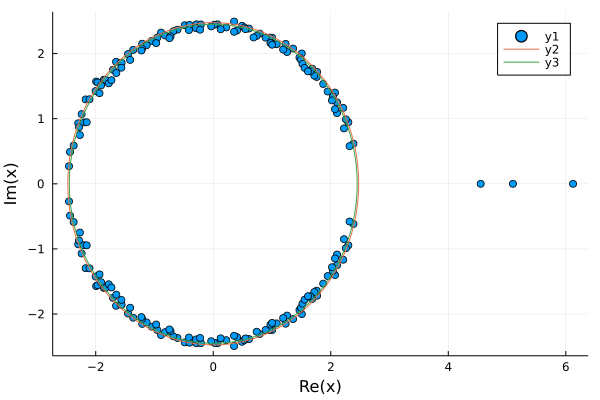

In [54]:
# let's look at the eigenvalues of B[1], the matrix for 2-edges

k = 2

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

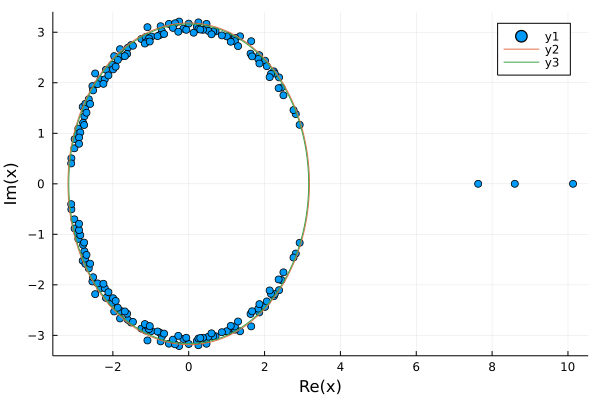

In [55]:
# let's look at the eigenvalues of B[2], the matrix for 3-edges

k = 3

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

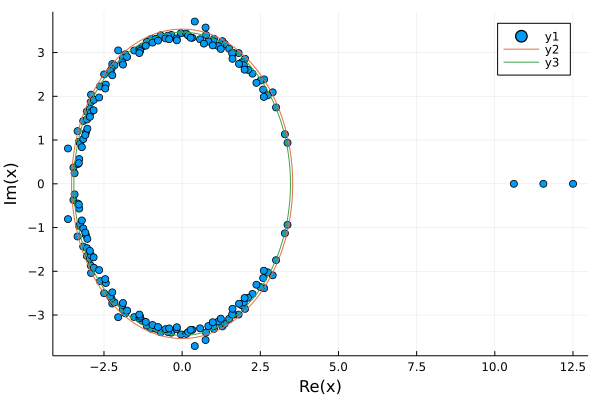

In [57]:
# let's look at the eigenvalues of B[3], the matrix for 4-edges

k = 4

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

There are two eigenvalues outside the bulk, other than the largest one, because there are 3 clusters. 

In [31]:
# let's compare that to the normalized branching matrix 

# c collects the average k-degree for each k
# M contains the normalized branching matrices (yes, the name of the function is weird)
# bit of a fudge here: this is the *empirical* normalized branching matrix obtained from 
# looking at the data, rather than the *theoretical* matrix obtained from the model parameters
c, M = degreeTensor(H, z; normalized = true);

In [32]:
# let's compare the normalized branching matrix for k-edges
M[k-1,:,:]

3×3 Matrix{Float64}:
  0.439419  -0.405394  -0.415353
 -0.202697   0.652905  -0.205187
 -0.207676  -0.205187   0.520124

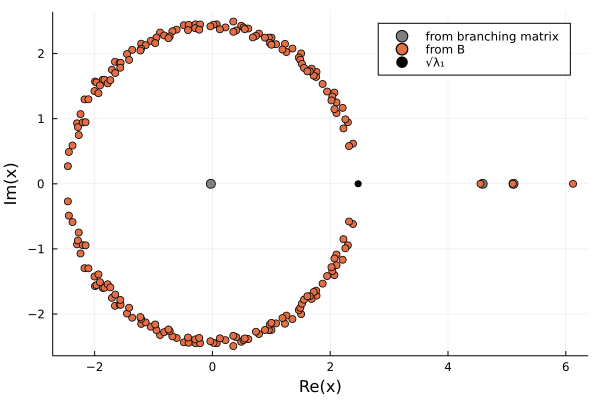

In [33]:
E_ = LinearAlgebra.eigen(M[k-1,:,:]).values;
# hand-waving: once I know the eigenvalues of the normalized branching matrix, I should scale to reflect the facts that
# - each node is connected to, on average, C[k]  k-edges.
# - each k-edge connects a node to k-1 distinct other nodes. 

E_ = E_*C[k]*(k-1) # scaling based on hand-waving above

plot(E_, zero(E_), seriestype = :scatter, markersize = 5, markercolor = "grey", label = "from branching matrix")
plot!(E[1], seriestype = :scatter, label = "from B")
plot!([sqrt(real(E[1][1]))], [0.0], markercolor = "black", label = "√λ₁", seriestype = :scatter)

In this particular case, it looks like the two eigenvalues of the branching matrix may correspond, after the hand-wavy scaling, to the two interesting eigenvalues of $B_k$. It also looks like the radius of the circle is plausibly the square root of the largest eigenvalue? 

# Some Questions

- The above is for individual $B_k$s, what happens for any of this when we add them together? 
- Can we be more concrete about justifying the hand-wavy scaling?
- In what cases can we just explicitly list out eigenvalues/eigenvectors for the branching matrix? 

# Hypergraph with 5 edges

In [58]:
# we will make a hypergraph with 200 nodes in cluster 1, 100 nodes in cluster 2, 100 nodes in cluster 3
N = [200, 100, 100];

# NaN refers to 1 edges, which don't matter
# 90% of 2-edges, 80% of 3-edges, and 90% of 4-edges, and 80% of 5-edges are within-group. 
P = [NaN, 0.9, 0.8, 0.9,0.8];

# each node is incident to, on average, 6 2-edges, 5 3-edges, and 4 4-edges, and 3 5-edges
C = [NaN, 6, 5, 4, 3];

# make the hypergraph
H = plantedPartitionHypergraph(N, C, P);

# true labels
z = vcat([repeat([z], N[z]) for z ∈ 1:length(N)]...);

In [59]:
# generate all the nonbacktracking matrices
B = nonBacktrackingMatrices(H)[1];

# B[1] is the nonbacktracking matrix for 2-edges
# B[2] is the nonbacktracking matrix for 3-edges
# B[3] is the nonbacktracking matrix for 4-edges
# B[4] is the nonbacktracking matrix for 5-edges

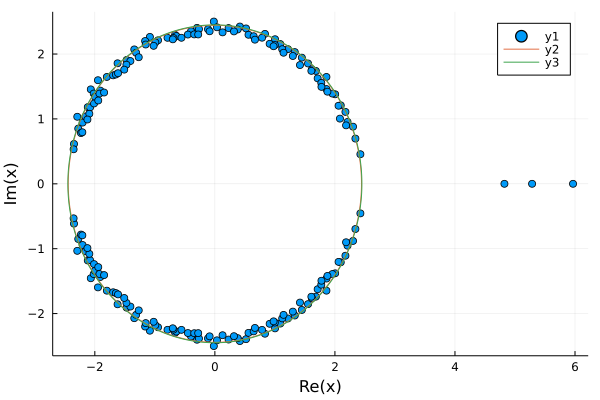

In [60]:
# let's look at the eigenvalues of B[1], the matrix for 2-edges

k = 2

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

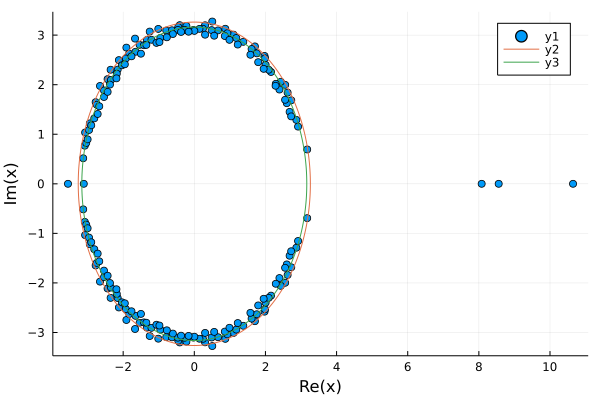

In [61]:
# let's look at the eigenvalues of B[2], the matrix for 3-edges

k = 3

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

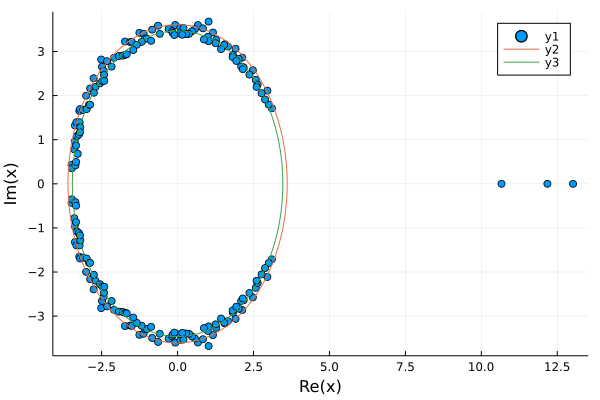

In [62]:
# let's look at the eigenvalues of B[3], the matrix for 4-edges

k = 4

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

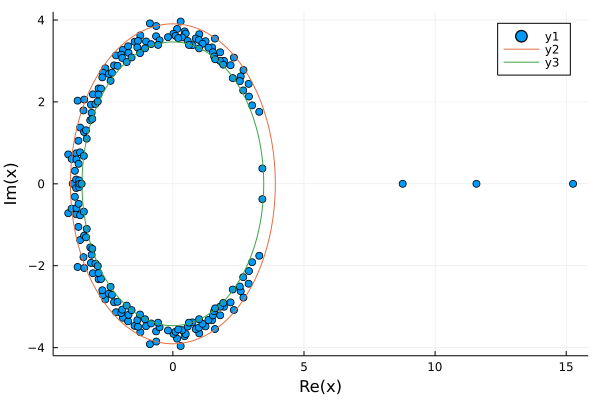

In [63]:
# let's look at the eigenvalues of B[4], the matrix for 5-edges

k = 5

E = Arpack.eigs(B[k-1]; nev = 200);
plot(E[1], seriestype = :scatter)
plot!(circle(sqrt(abs(E[1][1]))))
plot!(circle(sqrt(abs((k-1)*C[k]))))

# Exploring relationship between \sqrt{(k-1)*C_k} and \sqrt{\lambda_1} for varying C_k

In [41]:
# we will make a hypergraph with 200 nodes in cluster 1, 100 nodes in cluster 2, 100 nodes in cluster 3
N = [200, 100, 100];

# NaN refers to 1 edges, which don't matter
# 90% of 2-edges, 80% of 3-edges, and 90% of 4-edges, and 80% of 5-edges are within-group. 
P = [NaN, 0.9, 0.8, 0.9,0.8];

In [42]:
upper_deg = 100;
eig_vals = zeros(upper_deg);
avg_deg_vals = zeros(upper_deg);
k = 3
num_runs = 5

for c_3 in 1:upper_deg
    # each node is incident to, on average, 6 2-edges, 5 3-edges, and 4 4-edges, and 3 5-edges
    C = [NaN, 0, c_3, 0, 0];

    for j = 1:num_runs
        # make the hypergraph
        H = plantedPartitionHypergraph(N, C, P);

        B = reducedNonBacktrackingMatrix(H);
        E = Arpack.eigs(B; nev = 200);
        eig_vals[c_3] = eig_vals[c_3] + sqrt(abs(E[1][1]));
        avg_deg_vals[c_3] = avg_deg_vals[c_3] + sqrt(abs((k-1)*C[k]));
    end
    eig_vals[c_3] = eig_vals[c_3]/num_runs;
    avg_deg_vals[c_3] = avg_deg_vals[c_3]/num_runs;
    println(c_3)
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


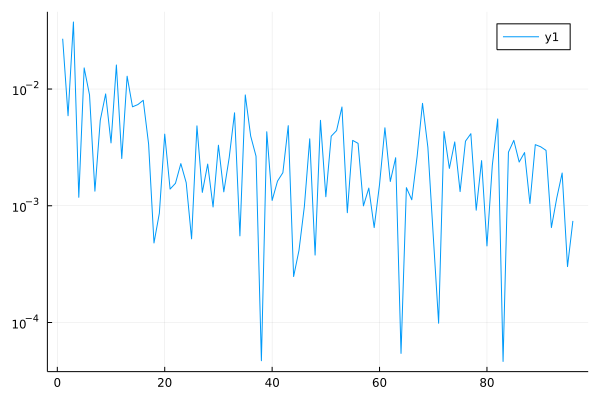

In [45]:
plot(1:96,abs.(eig_vals[1:96] - avg_deg_vals[1:96])./avg_deg_vals[1:96],yscale=:log10)

In [ ]:
#plot relative error

# Exploring relationship between \sqrt{(k-1)*C_k} and \sqrt{\lambda_1} for varying N (number of nodes in hypergraph)

In [36]:
# NaN refers to 1 edges, which don't matter
# 90% of 2-edges, 80% of 3-edges, and 90% of 4-edges, and 80% of 5-edges are within-group. 
P = [NaN, 0.9, 0.8, 0.9,0.8];

# each node is incident to, on average, 6 2-edges, 5 3-edges, and 4 4-edges, and 3 5-edges
C = [NaN, 0, 5, 0, 0];

In [37]:
upper_mult = 30;
eig_vals = zeros(upper_mult);
avg_deg_vals = zeros(upper_mult);
k = 3
num_runs = 10;


for n in 1:upper_mult
    # we will make a hypergraph with 20*n nodes in cluster 1, 10*n nodes in cluster 2, 10*n nodes in cluster 3
    N = [20*n, 10*n, 10*n];
        
    for j = 1:num_runs
        # make the hypergraph
        H = plantedPartitionHypergraph(N, C, P);

        B = reducedNonBacktrackingMatrix(H);
        E = Arpack.eigs(B; nev = 200);
        eig_vals[n] = eig_vals[n] + sqrt(abs(E[1][1]));
        avg_deg_vals[n] = avg_deg_vals[n] + sqrt(abs((k-1)*C[k]));
    end
    eig_vals[n] = eig_vals[n]/num_runs;
    avg_deg_vals[n] = avg_deg_vals[n]/num_runs;
    println(n)
end

┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92


1


┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 78
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 158
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 158
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 158
└ @ Arpack /Users/jam

2


┌ Warning: Adjusting nev from 200 to 158
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92
┌ Warning: Adjusting nev from 200 to 158
└ @ Arpack /Users/jamiehaddock/.julia/packages/Arpack/pLziT/src/Arpack.jl:92


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


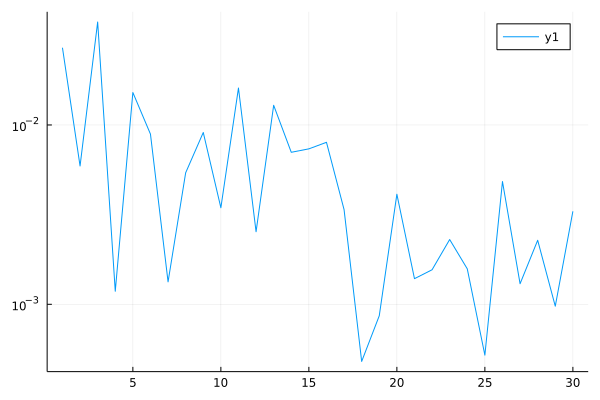

In [46]:
plot(1:30,abs.(eig_vals[1:upper_mult] - avg_deg_vals[1:upper_mult])./avg_deg_vals[1:upper_mult],yscale=:log10)

In [ ]:
#plot relative error